In [2]:
print("""This script was written in support of the experiments carried out in:
Nic Ezzell and Itay Hen, Advanced measurement techniques in quantum Monte Carlo: The permutation matrix representation approach, arXiv:2504.07295 (2025).""")

This script was written in support of the experiments carried out in:
Nic Ezzell and Itay Hen, Advanced measurement techniques in quantum Monte Carlo: The permutation matrix representation approach, arXiv:2504.07295 (2025).


In [8]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import glob
import pandas as pd
import sys
import scipy
sys.path.append("../../utils")
from exact_calculations import (prl_gs_chiE, prl_gs_chiF, prl_beta_chiE,
prl_beta_chiX, prl_beta_chiF, prl_gs_fidsus)

matplotlib.style.use("./style.mplstyle")
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r"\usepackage{amsmath}\usepackage{amsfonts}")

# H.txt, A.txt, B.txt and parameters.hpp for reference

In [9]:
Htxt = """-1.000000 1 Z 2 Z
-1.000000 1 Z 4 Z
-1.000000 2 Z 3 Z
-1.000000 2 Z 5 Z
-1.000000 3 Z 6 Z
-1.000000 4 Z 5 Z
-1.000000 4 Z 7 Z
-1.000000 5 Z 6 Z
-1.000000 5 Z 8 Z
-1.000000 6 Z 9 Z
-1.000000 7 Z 8 Z
-1.000000 8 Z 9 Z
-0.500000 1 X
-0.500000 2 X
-0.500000 3 X
-0.500000 4 X
-0.500000 5 X
-0.500000 6 X
-0.500000 7 X
-0.500000 8 X
-0.500000 9 X
"""

Atxt = """1.000000 1 X
1.000000 2 Z 3 Z
"""

Btxt = """-0.773712 3 X 9 X
0.155294 3 Z 6 Z 9 Z
-0.966529 1 Y 6 X 7 Z
"""

top_of_params = """#define Tsteps 10000000 // number of Monte-Carlo initial equilibration updates
#define steps 400000000 // number of Monte-Carlo updates
#define stepsPerMeasurement 10000 // number of Monte-Carlo updates per measurement
#define beta 1.0 // inverse temperature
#define tau 0.5 //imaginary propogation time
#define parity_cond 0 // controls parity subspace measurement 
"""

# Exact results computed with scipy

In [10]:
exact_basic_static_obs = {'h': -11.872957391249741,
 'h2': 143.67478491969055,
 'hDiag': -10.952919225551332,
 'hDiag2': 125.02127422832011,
 'hOffdiag': -0.9200381656984111,
 'hOffdiag2': 3.068614749239524}
                          
                          
exact_basic_dynamic_obs = {'hDiagCorr': 123.25563196842332,
 'hDiagEint': 123.7305025460231,
 'hDiagFint': 15.433440496378852,
 'hOffdiagCorr': 1.3029724893429748,
 'hOffdiagEint': 1.777843066941782,
 'hOffdiagFint': 0.1893580614936456}


exact_derived_obs = {'diagES': 3.7640629845711118,
 'diagFS': 0.43763555119735287,
 'offDiagES': 0.931372840600085,
 'offDiagFS': 0.08354928320093347,
 'Cv': 2.7076677052586717}

exact_a_obs = {'a': 1.1418726692273122,
 'a2': 2.4317395026094615,
 'aCorr': 1.6842434158042645,
 'aEint': 1.9021160962089128,
 'aFint': 0.2232224184276986}

exact_b_obs = {'b': (-0.047054083973626926),
 'b2': (1.556924793221),
 'bCorr': (0.13357942542553883),
 'bEint': 0.42755643192114545,
 'bFint': 0.030585969666162494}

exact_ab_obs = {'REab': (-0.01170670193979145), # actual value -0.01170670193979145-0.14371669386899988j
                'IMab': -0.14371669386899988,
                'abCorr': (-0.043610080717900554),
                'abEint': -0.0342878921857159,
                'abFint': -0.004907403556285083}
                
abba = -0.011706701939791474

exact_obs = exact_basic_static_obs | exact_basic_dynamic_obs | exact_derived_obs | exact_a_obs | exact_b_obs | exact_ab_obs

# Load in results computed from PMR-QMC

In [11]:
fname = "../data/advmea_3by3tfim_verify_data.csv"
cols = ["L", "lam", "Tsteps", "steps", "tot_steps", "avg_sgn", "avg_sgn_std", "avg_q", "max_q", 
        "a", "a_std", "a2", "a2_std", "aCorr", "aCorr_std", "aEint", "aEint_std", "aFint", "aFint_std", 
        "b", "b_std", "b2", "b2_std", "bCorr", "bCorr_std", "bEint", "bEint_std", "bFint", "bFint_std", 
        "REab", "REab_std", "IMab", "IMab_std", "abCorr", "abCorr_std", "abEint", "abEint_std", "abFint", "abFint_std", 
        "h", "h_std", "h2", "h2_std", "hDiag", "hDiag_std", "hDiag2", "hDiag2_std", 
        "hOffdiag", "hOffdiag_std", "hOffdiag2", "hOffdiag2_std", "zmag", "zmag_std", 
        "hDiagCorr", "hDiagCorr_std", "hDiagEint", "hDiagEint_std", "hDiagFint", "hDiagFint_std", 
        "hOffdiagCorr", "hOffdiagCorr_std", "hOffdiagEint", "hOffdiagEint_std", "hOffdiagFint", "hOffdiagFint_std", 
        "diagES", "diagES_std", "diagFS", "diagFS_std", "offDiagES", "offDiagES_std", "offDiagFS", "offDiagFS_std", 
        "Cv", "Cv_std", "a_therm", "a2_therm", "aCorr_therm", "aEint_therm", "aFint_therm", 
        "b_therm", "b2_therm", "bCorr_therm", "bEint_therm", "bFint_therm", "ab_therm", "abCorr_therm", 
        "abEint_therm", "abFint_therm", "h_therm", "h2_therm", "hDiag_therm", "hDiag2_therm", 
        "hOffdiag_therm", "hOffdiag2_therm", "zmag_therm", "hDiagCorr_therm", "hDiagEint_therm", 
        "hDiagFint_therm", "hOffdiagCorr_therm", "hOffdiagEint_therm", "hOffdiagFint_therm", 
        "diagES_therm", "diagFS_therm", "offDiagES_therm", "offDiagFS_therm", "Cv_therm", 
        "tot_cpu_time", "wall_time"]

df = pd.read_csv(fname, names=cols, skiprows=1)
df.head()
qmc_obs = df.iloc[0].to_dict()

y_cols = []
y_labels = []

# add basic observables (k = 0 --> 5)
y_cols += ["h", "h2", "hDiag", "hDiag2", "hOffdiag", "hOffdiag2"]
y_labels += [r"$| \langle H \rangle |$", r"$\langle H^2 \rangle$",
            r"$| \langle H_{\text{diag}} \rangle  |$", r"$\langle (H_{\text{diag}})^2 \rangle$",
            r"$| \langle H_{\text{offdiag}} \rangle | $", r"$\langle (H_{\text{offdiag}})^2 \rangle$"]
# add Hdiag correlator and such (k = 6 --> 8)
y_cols += ["hDiagCorr", "hDiagEint", "hDiagFint"]
y_labels += [r"$\langle H_{\text{diag}}(\tau=\beta/2) H_{\text{diag}} \rangle$",
             r"$\int_0^{\beta} \langle H_{\text{diag}}(\tau) H_{\text{diag}} \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle  H_{\text{diag}}(\tau) H_{\text{diag}} \rangle \mathrm{d} \tau $"]
# add Hoffdiag correlator and such (k = 9 --> 11)
y_cols += ["hOffdiagCorr", "hOffdiagEint", "hOffdiagFint"]
y_labels += [r"$\langle H_{\text{offdiag}}(\tau=\beta/2) H_{\text{offdiag}} \rangle$",
             r"$\int_0^{\beta} \langle H_{\text{offdiag}}(\tau) H_{\text{offdiag}} \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle  H_{\text{offdiag}}(\tau) H_{\text{offdiag}} \rangle \mathrm{d} \tau $"]
# add derived observables (k = 12 --> 16)
y_cols += ["Cv", "diagES", "diagFS", "offDiagES", "offDiagFS"]
y_labels += [r"$C_v$", r"$\chi^{H_{\text{diag}}}_{E}$", r"$\chi^{H_{\text{diag}}}_{F}$", r"$\chi^{H_{\text{offdiag}}}_{E}$", r"$\chi^{H_{\text{offdiag}}}_{F}$"]
# add A observables (k = 17 --> 21)
y_cols += ["a", "a2", "aCorr", "aEint", "aFint"]
y_labels += [r"$\langle A \rangle$", r"$\langle A^2 \rangle$",
             r"$\langle A(\tau=\beta/2) A \rangle$",
             r"$\int_0^{\beta} \langle A(\tau) A \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle A(\tau) A \rangle \mathrm{d} \tau$"]
# add B observables (k = 22 --> 26)
y_cols += ["b", "b2", "bCorr", "bEint", "bFint"]
y_labels += [r"$\langle B \rangle$", r"$\langle B^2 \rangle$",
             r"$\langle B(\tau=\beta/2) B \rangle$",
             r"$\int_0^{\beta} \langle B(\tau) B \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle B(\tau) B \rangle \mathrm{d} \tau$"]
# add AB observables (k = 27 --> 30)
y_cols += ["REab", "IMab", "abCorr", "abEint", "abFint"]
y_labels += [r"$\text{Re}(\langle AB \rangle)$",
             r"$\text{Im}(\langle AB \rangle)$",
             r"$\langle A(\tau=\beta/2) B \rangle$",
             r"$\int_0^{\beta} \langle A(\tau) B \rangle \mathrm{d} \tau $",
             r"$\int_0^{\beta/2} \tau \langle A(\tau) B \rangle \mathrm{d} \tau$"]

y_label_dict = {y_cols[j]: y_labels[j] for j in range(len(y_cols))}

In [12]:
for key in exact_obs:
    diff = np.abs(qmc_obs[key] - exact_obs[key])
    if diff > 2 * qmc_obs[key + "_std"]:
        print(key)

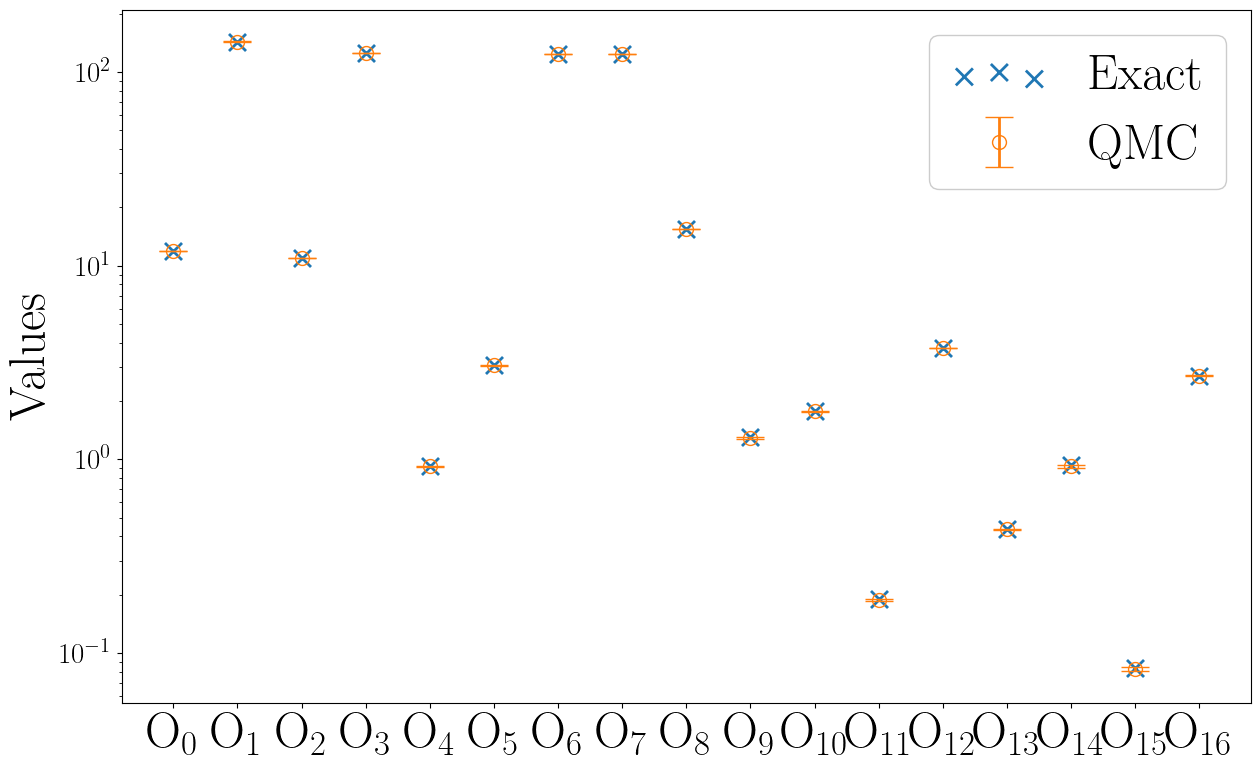

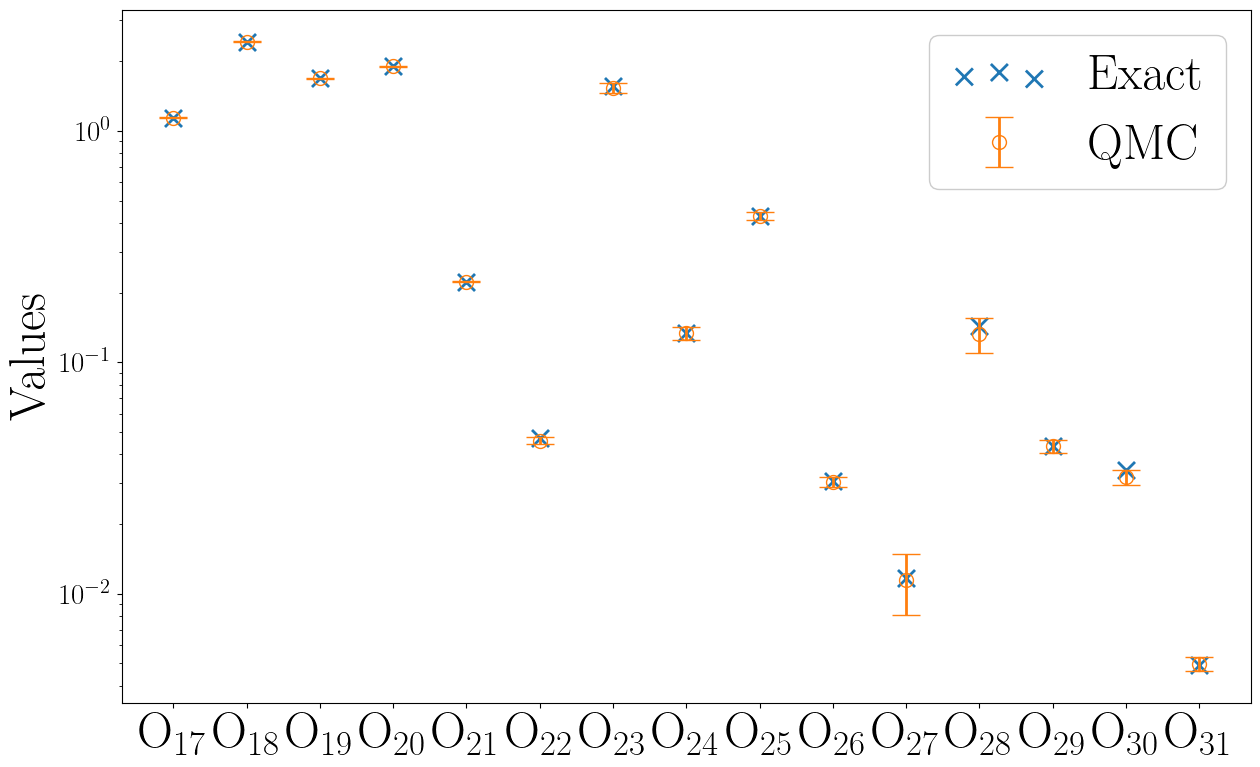

In [17]:
plt_height = 9
plt_width = plt_height * 1.618

counter = 0

fnames = ["figures/verify_standard_obs.pdf", "figures/verify_custom_obs.pdf"]
groupings = [exact_basic_static_obs | exact_basic_dynamic_obs | exact_derived_obs, exact_a_obs | exact_b_obs | exact_ab_obs]
idx = 0
for exact_obs in groupings:

    # Extract relevant keys
    keys = list(exact_obs.keys())
    key_labels = [y_label_dict[k] for k in keys]

    # Exact values
    exact_values = np.abs(np.array([exact_obs[key] for key in keys]))

    # QMC values and errors
    qmc_values =np.abs(np.array([qmc_obs[key] for key in keys]))
    qmc_errors = np.array([2 * qmc_obs.get(key + '_std', 0) for key in keys])  # Use 0 if no std available

    # Bar positions
    x = np.arange(len(keys))  # X positions
    width = 0.3  # Width for bars

    # Create figure
    plt.figure(figsize=(plt_width, plt_height))

    # Plot Exact values as 'x' markers
    plt.scatter(x, exact_values, label="Exact", marker='x', s=150)
    # Plot QMC values as ◦ with error bars
    plt.errorbar(x, qmc_values, yerr=qmc_errors, fmt='o', markerfacecolor='none', markeredgecolor='C1', ecolor='C1', label="QMC", markersize=10, capsize=10)

    # Labeling
    new_key_labels = []
    for k in range(len(key_labels)):
        new_key_labels.append(rf"$\mathrm{{O}}_{{{k+idx}}}$")
    idx += len(key_labels)
    #plt.xticks(x, new_key_labels, rotation=0, ha='right')
    fsize = 36
    plt.xticks(x, new_key_labels, fontsize=fsize)
    #plt.xlabel("Observables")
    plt.ylabel("Values", fontsize=fsize)
    plt.yscale("log")
    plt.legend(fontsize=fsize)

    # Show plot
    #plt.show()
    plt.savefig(fnames[counter], dpi=800, bbox_inches="tight")
    counter += 1